In [ ]:
pip install neuralprophet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.4/145.4 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 829.5/829.5 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 14.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86

In [ ]:
from neuralprophet import NeuralProphet
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
stock_symbol = '005935.KS'
start_date = '2015-01-01'
end_date = '2023-01-01'

stock_data = yf.download(stock_symbol, start = start_date, end = end_date)

print(stock_data)

[*********************100%%**********************]  1 of 1 completed

               Open     High      Low    Close     Adj Close   Volume
Date                                                                 
2015-01-02  20780.0  20780.0  20240.0  20320.0  15590.952148   942200
2015-01-05  20320.0  20340.0  20120.0  20220.0  15514.220703   816600
2015-01-06  20220.0  20280.0  19820.0  20100.0  15422.144531  2318000
2015-01-07  20000.0  20100.0  19840.0  20020.0  15360.772461  1208650
2015-01-08  20320.0  20700.0  20140.0  20440.0  15683.021484  1670900
...             ...      ...      ...      ...           ...      ...
2022-12-23  52600.0  52900.0  52500.0  52500.0  50557.480469   496781
2022-12-26  52600.0  52700.0  52000.0  52200.0  50268.582031   386255
2022-12-27  52000.0  52500.0  52000.0  52500.0  50557.480469   589126
2022-12-28  52000.0  52100.0  51200.0  51300.0  49744.886719   657213
2022-12-29  51000.0  51100.0  50400.0  50500.0  48969.136719   722569

[1966 rows x 6 columns]


In [ ]:
stock_data.to_csv('stock_data.csv')

In [ ]:
stocks = pd.read_csv('stock_data.csv')
stocks['Date'] = pd.to_datetime(stocks['Date'])
stocks = stocks[['Date', 'Close']]
stocks.columns = ['ds', 'y']
stocks

,ds,y
0,2015-01-02,20320.0
1,2015-01-05,20220.0
2,2015-01-06,20100.0
3,2015-01-07,20020.0
4,2015-01-08,20440.0
...,...,...
1961,2022-12-23,52500.0
1962,2022-12-26,52200.0
1963,2022-12-27,52500.0
1964,2022-12-28,51300.0


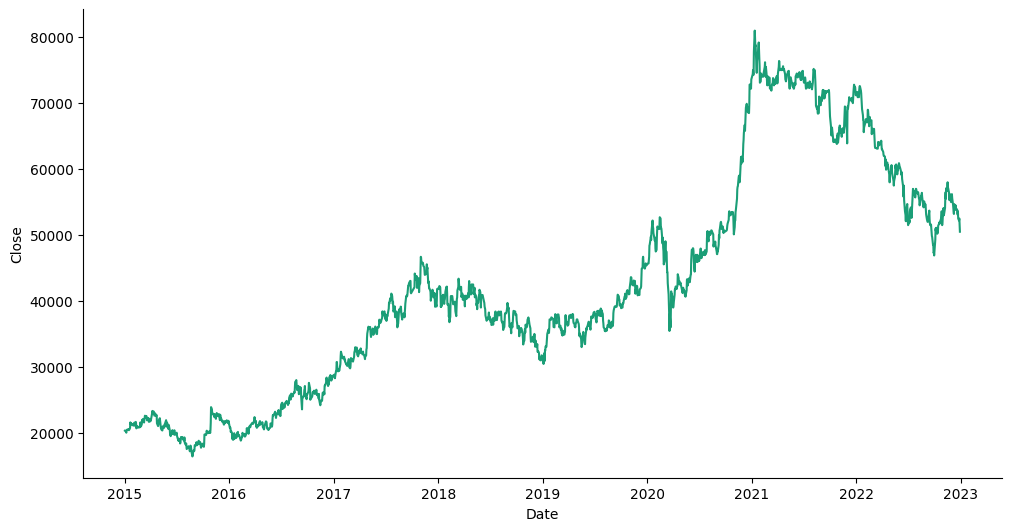

In [ ]:
# @title Date vs Close

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Close']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = stocks.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Close')

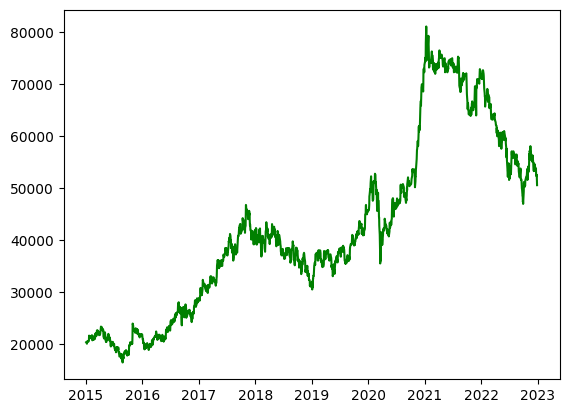

In [ ]:
plt.plot(stocks['Date'], stocks['Close'], label = 'actual', c ='g')
plt.show()

In [ ]:
model = NeuralProphet()
model.fit(stocks)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 95.778% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 95.778% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as B
INFO:NP.df_utils:Dataframe freq automatically defined as B
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO:NP.utils:Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO:NP.config:Auto-set batch_size to 32
INFO - (NP.co

Finding best initial lr:   0%|          | 0/232 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

,MAE,RMSE,Loss,RegLoss,epoch
0,38622.472656,48196.582031,0.409173,0.0,0
1,22534.890625,28036.869141,0.205312,0.0,1
2,10779.329102,13264.833008,0.067259,0.0,2
3,6520.352539,8109.474121,0.028702,0.0,3
4,5769.516113,7374.554199,0.024296,0.0,4
...,...,...,...,...,...
85,3278.924805,4269.772949,0.008230,0.0,85
86,3293.103271,4290.464355,0.008317,0.0,86
87,3293.652100,4282.796875,0.008241,0.0,87
88,3287.991699,4284.076172,0.008221,0.0,88


In [ ]:
future = model.make_future_dataframe(stocks, periods = 300)

forecast = model.predict(future)

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 95.778% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 95.778% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B
INFO:NP.df_utils:Defined frequency is equal to major frequency - B
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 99.667% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 99.667% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B
INFO:NP.df_utils:Defined frequency is equal to major frequency - B
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 99.667% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 99.667% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is

Predicting: 62it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 95.778% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 95.778% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B
INFO:NP.df_utils:Defined frequency is equal to major frequency - B
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 95.778% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 95.778% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B
INFO:NP.df_utils:Defined frequency is equal to major frequency - B


Predicting: 62it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


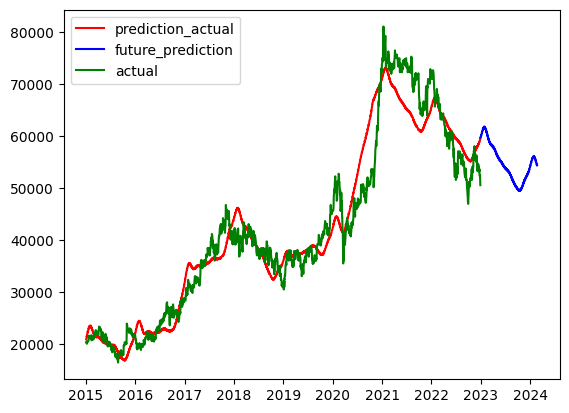

In [ ]:
actual_prediction = model.predict(stocks)

plt.plot(actual_prediction['ds'], actual_prediction['yhat1'], label = 'prediction_actual', c = 'r')

plt.plot(forecast['ds'], forecast['yhat1'], label = 'future_prediction', c = 'b')
plt.plot(stocks['ds'], stocks['y'], label = 'actual', c ='g')
plt.legend()
plt.show()

In [ ]:
model.plot_components(forecast)

WARNING - (NP.plotting.log_warning_resampler_switch_to_valid_env) - Warning: plotly-resampler not supported for the environment you are using. Plotting backend automatically switched to 'plotly' without resampling 
